In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



## Componentes Principales

### 1. Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas
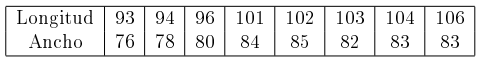

- a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfico
- b) Calcular la matriz de covarianzas y hallar sus autovalores y autovectores

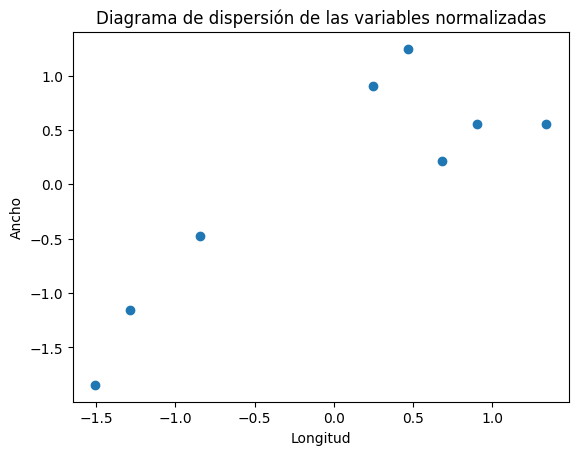

In [2]:
longitud = np.array([93,94,96,101,102,103,104,106])
ancho = np.array([76,78,80,84,85,82,83,83])

# Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión
longitud = (longitud - np.mean(longitud))/np.std(longitud)
ancho = (ancho - np.mean(ancho))/np.std(ancho)

plt.scatter(longitud, ancho)
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.title('Diagrama de dispersión de las variables normalizadas')
plt.show()

In [5]:
np.mean(longitud), np.std(longitud), np.mean(ancho), np.std(ancho)

(5.551115123125783e-17, 1.0, 5.551115123125783e-17, 1.0)

In [15]:
# Calculamos la matriz de covarianzas y hallamos los autovalores y autovectores
longitud = np.array([93,94,96,101,102,103,104,106])
ancho = np.array([76,78,80,84,85,82,83,83])

cov = np.cov(longitud, ancho)
autovalores, autovectores = np.linalg.eig(cov)

print('Matriz de covarianzas:')
print(cov)
print('\nAutovalores:')
print(autovalores)
print('\nAutovectores:')
print(autovectores)


Matriz de covarianzas:
[[23.83928571 13.05357143]
 [13.05357143  9.69642857]]

Autovalores:
[31.61375991  1.92195437]

Autovectores:
[[ 0.85916293 -0.51170211]
 [ 0.51170211  0.85916293]]


- #### c) Hallar las componentes principales

In [13]:
# Lo hacemos con PCA
pca = PCA(n_components=2)

X = np.array([longitud, ancho]).T

# Luego X_star es la matriz de datos centrada
X_star = X - np.mean(X, axis=0)
# X_star = StandardScaler().set_output(transform="pandas").fit_transform(datos)  # Otra forma de hacerlo con StandardScaler para dataframes
# Ahora ajustamos el PCA
pca.fit(X_star)
# Obtenemos los componentes principales
componentes_principales = pca.components_
componentes_principales

array([[-0.85916293, -0.51170211],
       [-0.51170211,  0.85916293]])

- #### d) Decidir si la información está mayormente representada en una de estas dos componentes
- #### e) Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿ A que conclusión puede llegar?

In [22]:
n = len(X_star)
Sigma = (1/n) * X_star.T @ X_star
Sigma

array([[20.859375, 11.421875],
       [11.421875,  8.484375]])

In [25]:
gamma, U = np.linalg.eigh(Sigma)
gamma, U # U son los componentes principales

(array([ 1.68171008, 27.66203992]),
 array([[ 0.51170211, -0.85916293],
        [-0.85916293, -0.51170211]]))

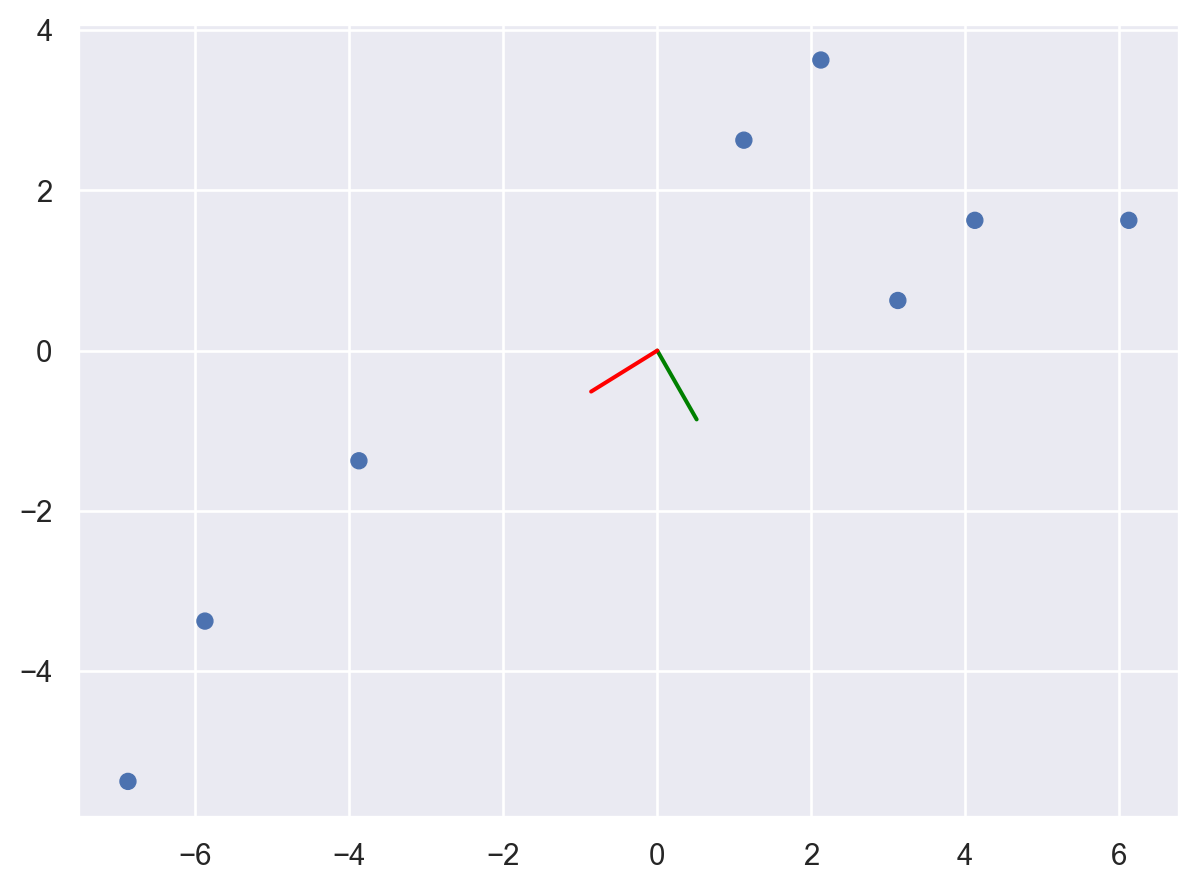

In [37]:
(
    so.Plot()
    .add(so.Dot(),x = X_star[:,0], y = X_star[:,1])
    # .add(so.Line(color="red"), x = [0, componentes_principales[0,0]], y = [0, componentes_principales[0,1]])
    # .add(so.Line(color="blue"), x = [0, componentes_principales[1,0]], y = [0, componentes_principales[1,1]])
    .add(so.Line(color="green"), x = [0, U[0,0]], y = [0, U[1,0]])
    .add(so.Line(color="red"), x = [0, U[0,1]], y = [0, U[1,1]])
)

In [12]:
# Proporción de varianza explicada por cada componente
varianza_explicada = autovalores / np.sum(autovalores)

print('Proporción de varianza explicada por cada componente:')
print(varianza_explicada)


Proporción de varianza explicada por cada componente:
[0.94268933 0.05731067]


Entonces, La primer componente explica el 94% de la variabilidad

## Ejercicio 2.


#### Sea 
$$ A = \begin{bmatrix}
3 & 1 & 1 \\
1 & 3 & 1 \\
1 & 1 & 5 \\
\end{bmatrix} $$
#### la matriz de covarianzas de una cierta muestra de datos cuya media es cero.

- #### a) Hallar los autovalores y autovectores de la matriz de covarianzas.
- #### b) Dar la expresión de las componentes principales z1, z2, z3 e indicar la proporción de la variabilidad explicada por cada una de ellas.
- #### c) Hallar los scores de las primeras dos componentes principales correspondientes a la observación x1 = 2, x2 = 2, x3 = 1 (es decir, los valores de z1 y z2 para dicha observación)

In [38]:
#a 
A = np.array([[3, 1, 1],
              [1, 3, 1],
              [1, 1, 5]])

# Calcular los autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)

print('Autovalores:')
print(autovalores)
print('\nAutovectores:')
print(autovectores)


Autovalores:
[6. 2. 3.]

Autovectores:
[[-4.08248290e-01 -7.07106781e-01 -5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01 -5.77350269e-01]
 [-8.16496581e-01  1.07421292e-17  5.77350269e-01]]


##### b) Las componentes principales $z_1$,$z_2$ y $z_3$ son combinaciones lineales de las variables originales, y están determinadas por los autovectores. Cada componente principal se puede escribir como
$$ z_i = a_i^T * X$$ 
donde $a_i$ es el i-esimo autovector y $X$ es el vector de las variables originales

In [39]:
# b
varianza_total = np.sum(autovalores)
proporcion_varianza_explicada = autovalores / varianza_total
print('\nProporción de varianza explicada por cada componente principal:')
print(proporcion_varianza_explicada)


Proporción de varianza explicada por cada componente principal:
[0.54545455 0.18181818 0.27272727]


In [40]:
# C
x = np.array([2, 2, 1])

# Autovectores correspondientes a los primeros dos componentes principales
autovectores_primeros_2 = autovectores[:, :2]

# Calcular los scores (proyección de la observación en los componentes principales)
scores = np.dot(x, autovectores_primeros_2)

print('Scores de las primeras dos componentes principales:')
print('z1:', scores[0])
print('z2:', scores[1])

Scores de las primeras dos componentes principales:
z1: -2.4494897427831774
z2: 1.5650543636895802e-15


## **Ejercicio 3**. Implementar un programa que reciba como input un archivo de datos y un número `p_acum` y devuelva la mínima cantidad de componentes principales que deben considerarse para que el porcentaje de varianza acumulada sea mayor o igual que `p_acum`

In [86]:
def calcular_cantidad_minima(archivo, p_acum):
    # Leemos el archivo
    datos = pd.read_csv(archivo,sep="\t")
    
    # Estandarizamos los datos
    scaler = StandardScaler()
    chalets_estandarizados = scaler.fit_transform(datos)
    df_estandarizado = pd.DataFrame(chalets_estandarizados, columns=datos.columns)
    
    # Calculamos la matriz de covarianzas
    cov_estandarizado = df_estandarizado.cov(ddof=0)
    
    # Calculamos los autovalores 
    autovalores, _ = np.linalg.eig(cov_estandarizado)
    
    # Ordenamos los autovalores de mayor a menor
    indices = np.argsort(autovalores)[::-1]
    autovalores = autovalores[indices]
    
    # Calculamos la proporción de varianza explicada
    varianza_explicada = autovalores / np.sum(autovalores)
    
    # Calculamos la proporción de varianza explicada acumulada
    varianza_acumulada = np.cumsum(varianza_explicada)
        
    # Calculamos el número de componentes principales necesarios para explicar p_acum de la varianza
    n_componentes = np.argmax(varianza_acumulada >= p_acum) + 1
    
    return n_componentes
    

## **Ejercicio 4.** Considerando el archivo de datos p8-chalets.csv se pide:

- #### a) Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de correlación entre las variables a partir de estos gráficos

In [45]:
chalets = pd.read_csv("../_src/Datasets/p8-chalets.csv")
chalets.head()

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3


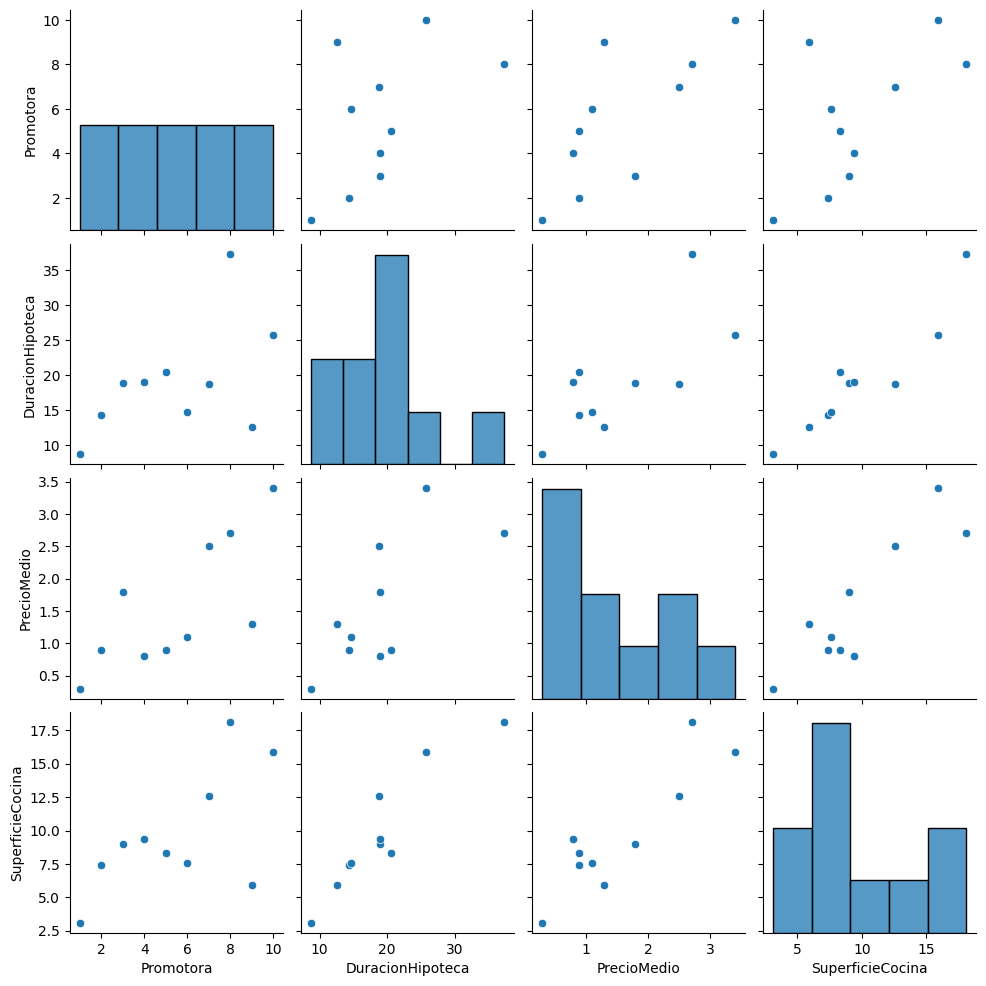

In [47]:
sns.pairplot(chalets)
plt.show()

- `Promotora` vs el resto: no parece haber ninguna correlacion entre promotora y las demas variables. Los datos estan bastante dispersos, sin embargo contra `PrecioMedio` parece haber alguna relacion lineal
- `DuracionHipoteca` vs `PrecioMedio`: No parece haber mucha correlacion, datos dispersos , pero si un pispazo de correlacion lineal 
- `DuracionHipoteca` vs `SuperficieCocina` y `PrecioMedio` vs `SuperficieCocina`: Se nota mucho una relacion lineal, mucho mas presente en la primera.

- #### b) Calcular la matriz de covarianzas
- #### c) A partir de lo observado, resulta razonable pensar en un análisis de componentes principales para reducir la dimensión del problema?

In [61]:
# Calculamos la matriz de covarianzas
cov = chalets.cov()
print(cov)

                  Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
Promotora          9.166667         12.594444     2.250000          8.838889
DuracionHipoteca  12.594444         63.298333     5.745000         33.863889
PrecioMedio        2.250000          5.745000     0.993444          4.053222
SuperficieCocina   8.838889         33.863889     4.053222         20.849000


In [65]:
# No parece correcto ( Uso el notebook 18)

# Como tenemos datos en distintas escalas llevamos los datos a media 0 y varianza 1.
X_star = StandardScaler().set_output(transform="pandas").fit_transform(chalets)
print(X_star)
# Calculamos la matriz de covarianza:
X_star_t = np.transpose(X_star)
N = len(X_star)
Sigma = (X_star_t @ X_star) / N
print(Sigma)

   Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
0  -1.566699         -1.371270    -1.343107         -1.530558
1  -1.218544         -0.629327    -0.708568         -0.537888
2  -0.870388         -0.019873     0.243240         -0.168523
3  -0.522233         -0.006624    -0.814325         -0.076182
4  -0.174078          0.192110    -0.708568         -0.330120
5   0.174078         -0.576331    -0.497055         -0.491718
6   0.522233         -0.033122     0.983535          0.662549
7   0.870388          2.417940     1.195048          1.932242
8   1.218544         -0.854560    -0.285542         -0.884168
9   1.566699          0.881058     1.935343          1.424365
                  Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
Promotora          1.000000          0.522850     0.745598          0.639366
DuracionHipoteca   0.522850          1.000000     0.724473          0.932176
PrecioMedio        0.745598          0.724473     1.000000          0.890607
Superficie

In [68]:
# Comparamos con el comando cov de numpy
print(np.cov(np.transpose(X_star), bias = 1))

[[1.         0.52285005 0.74559847 0.63936571]
 [0.52285005 1.         0.72447283 0.93217635]
 [0.74559847 0.72447283 1.         0.8906068 ]
 [0.63936571 0.93217635 0.8906068  1.        ]]


In [73]:
# Ahora hago lo mismo pero con pandas
scaler = StandardScaler()
chalets_estandarizados = scaler.fit_transform(chalets)
chalets_estandarizados_df = pd.DataFrame(chalets_estandarizados, columns=chalets.columns)
cov_estandarizado = chalets_estandarizados_df.cov(ddof=0) # ddof=0 para que divida por N en lugar de N-1
print(cov_estandarizado)

                  Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
Promotora          1.000000          0.522850     0.745598          0.639366
DuracionHipoteca   0.522850          1.000000     0.724473          0.932176
PrecioMedio        0.745598          0.724473     1.000000          0.890607
SuperficieCocina   0.639366          0.932176     0.890607          1.000000


Una vez hecho, ahora si, parece ser que hay mucha correlacion entre las variables (antes mencionadas), por lo que podriamos reducir la dimension del problema a 3 variables o incluso 2.

In [79]:
# Calcular los autovalores y autovectores
autovalores, autovectores = np.linalg.eig(cov_estandarizado)
print('Autovalores:')
print(autovalores)

print('\nAutovectores:')
print(autovectores)

# Ordenar los autovalores en orden descendente
autovalores_ordenados = np.sort(autovalores)[::-1]

# Calcular la proporción de varianza explicada
varianza_explicada = autovalores_ordenados / np.sum(autovalores_ordenados)
varianza_acumulada = np.cumsum(varianza_explicada)

# Imprimir autovalores y proporciones de varianza explicada
print("\nAutovalores ordenados:\n", autovalores_ordenados)
print("\nProporción de varianza explicada:\n", varianza_explicada)
print("\nVarianza acumulada:\n", varianza_acumulada)

Autovalores:
[3.24284767 0.54489966 0.19168767 0.020565  ]

Autovectores:
[[-0.44166807 -0.77727566  0.44627764  0.04010157]
 [-0.49466329  0.53565518  0.48663073 -0.48121959]
 [-0.52027983 -0.15227077 -0.74522343 -0.38828412]
 [-0.53809521  0.29279633 -0.09310661  0.78489172]]

Autovalores ordenados:
 [3.24284767 0.54489966 0.19168767 0.020565  ]

Proporción de varianza explicada:
 [0.81071192 0.13622492 0.04792192 0.00514125]

Varianza acumulada:
 [0.81071192 0.94693683 0.99485875 1.        ]


- #### d) Hallar la primera componente principal.
- #### e) Indicar qué porcentaje de variabilidad total logra explicar esta componente.

In [80]:
# Ordenar los autovalores y autovectores en orden descendente
indices_ordenados = np.argsort(autovalores)[::-1]
autovectores_ordenados = autovectores[:, indices_ordenados]
primera_componente_principal = autovectores_ordenados[:, 0]

print("Primera Componente Principal:")
print(primera_componente_principal)
print("\nVarianza explicada por la primera componente principal:")
print(varianza_explicada[0])

Primera Componente Principal:
[-0.44166807 -0.49466329 -0.52027983 -0.53809521]

Varianza explicada por la primera componente principal:
0.810711916733424


## **Ejercicio 5**

#### Considerar el dataset p8-iris.txt, que representa información del largo y ancho del pétalo y del sépalo de diversas muestras de colores de la especie Iris, la cual se puede distinguir en varias subespecies. Aplicar el programa del ejercicio anterior para determinar la menor cantidad de componentes principales necesarias para alcanzar un 90 % de variabilidad. Graficar los datos transformados que se obtienen luego de reducir variables 

In [83]:
iris = pd.read_csv("../_src/Datasets/p8-iris.txt", sep='\t')
iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
calcular_cantidad_minima("../_src/Datasets/p8-iris.txt",0.90)

2

In [89]:
# Estandarizar los datos (media 0 y varianza 1)
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(iris)
df_estandarizado = pd.DataFrame(datos_estandarizados, columns=iris.columns)
cov_estandarizado = df_estandarizado.cov(ddof=0)

autovalores, autovectores = np.linalg.eig(cov_estandarizado)

# Ordenar los autovalores de mayor a menor
indices = np.argsort(autovalores)[::-1]
autovalores_ordenados = autovalores[indices]
autovectores_ordenados = autovectores[:, indices]

# Calcular la proporción de varianza explicada
varianza_explicada = autovalores_ordenados / np.sum(autovalores_ordenados)

# Calcular la proporción de varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Mostrar los resultados
print("Autovalores ordenados:", autovalores_ordenados)
print("Proporción de varianza explicada:", varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)

Autovalores ordenados: [2.91081808 0.92122093 0.14735328 0.02060771]
Proporción de varianza explicada: [0.72770452 0.23030523 0.03683832 0.00515193]
Varianza acumulada: [0.72770452 0.95800975 0.99484807 1.        ]


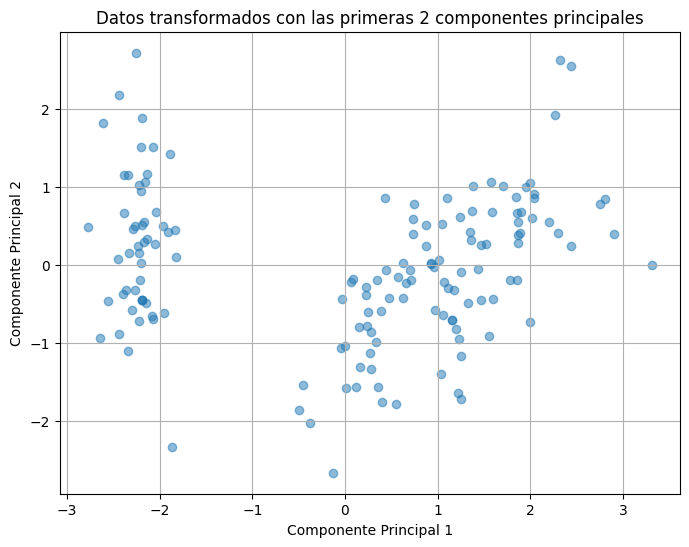

In [92]:
# Aplicar PCA con el número de componentes necesarios
pca = PCA(n_components=2)
datos_transformados = pca.fit_transform(datos_estandarizados)

# Graficar los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(datos_transformados[:, 0], datos_transformados[:, 1], alpha=0.5)
plt.title(f'Datos transformados con las primeras 2 componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

## **Ejercicio 6**

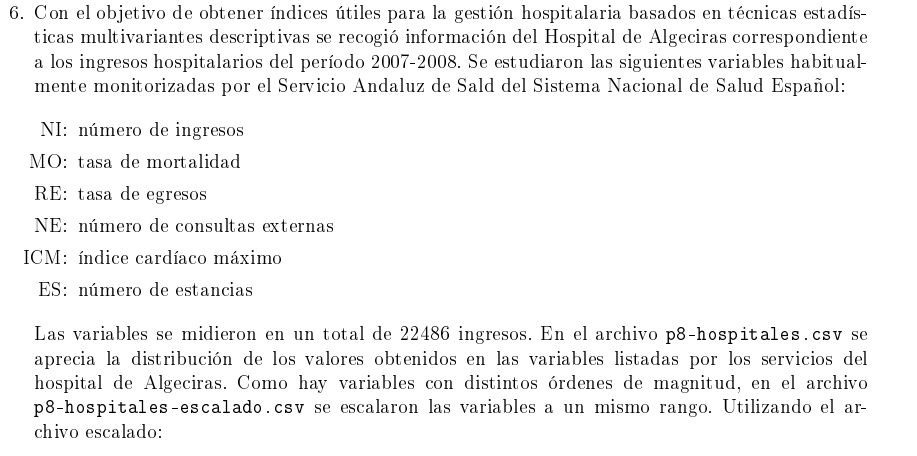

- #### a) Calcular las dos primeras componentes principales.
- #### b) ¿Qué porcentaje de variabilidad logra captar cada una de ellas?
- #### c) ¿Considera adecuado considerar dos componentes principales?
- #### d) Hallar la correlación entre las nuevas variables y las originales (por medio de R2).
- #### e) ¿Se obtienen las mismas conclusiones si se utiliza el archivo sin escalar?

In [96]:
hospitales = pd.read_csv("../_src/Datasets/p8-hospitales.csv")
hospitales

,Servicio,NI,MO,RE,NE,ICM,ES
0,Cirugia,2158,3.8,3.4,8567,1.17,21879
1,Tocoginecologia,5146,0.3,3.1,3782,0.52,22068
2,Hematologia,489,4.1,6.8,11005,1.68,4980
3,Cardiologia,677,2.2,3.9,2161,1.30,8587
4,Digestivo,698,5.9,3.2,9473,1.06,7189
5,Medicina.Interna,4171,12.5,5.5,21563,1.04,47909
6,Neumologia,562,5.1,4.4,2659,1.47,5098
7,Otorrinolaringologia,650,2.1,2.3,22024,0.87,3161
8,Oftalmologia,990,0.0,0.2,21752,0.82,1096
9,Pediatria,3752,0.3,2.1,8273,0.51,12152


In [108]:
# Primero estandarizamos los datos
scaler = StandardScaler()
hospitales_estandarizados = scaler.fit_transform(hospitales.drop(columns='Servicio'))
df_estandarizado = pd.DataFrame(hospitales_estandarizados, columns=hospitales.drop(columns='Servicio').columns)

# Calculamos la matriz de covarianzas
cov_estandarizado = df_estandarizado.cov(ddof=0)

# Calculamos los autovalores y autovectores
autovalores, autovectores = np.linalg.eig(cov_estandarizado)

# Ordenamos los autovalores de mayor a menor
indices = np.argsort(autovalores)[::-1]
autovalores_ordenados = autovalores[indices]
autovectores_ordenados = autovectores[:, indices]

# Calculamos la proporción de varianza explicada
varianza_explicada = autovalores_ordenados / np.sum(autovalores_ordenados)

# Calculamos la proporción de varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Mostramos los resultados
print("Autovalores ordenados:\n", autovalores_ordenados)
print("\nProporción de varianza explicada:\n", varianza_explicada)
print("\nVarianza acumulada:\n", varianza_acumulada)

print("\nPrimera componente principal:")
print(autovectores_ordenados[:, 0])
print("Porcentaje de variabilidad: ", varianza_explicada[0])

print("\nSegunda componente principal:")
print(autovectores_ordenados[:, 1])
print("Porcentaje de variabilidad: ", varianza_explicada[1])


Autovalores ordenados:
 [2.26296208 1.8234069  1.04387564 0.64640479 0.16835344 0.05499715]

Proporción de varianza explicada:
 [0.37716035 0.30390115 0.17397927 0.10773413 0.02805891 0.00916619]

Varianza acumulada:
 [0.37716035 0.6810615  0.85504077 0.9627749  0.99083381 1.        ]

Primera componente principal:
[-0.61757353 -0.22301754  0.27180712  0.10589713  0.45372424 -0.52716897]
Porcentaje de variabilidad:  0.3771603474527898

Segunda componente principal:
[-0.01036438 -0.56624242 -0.48303014 -0.29973312 -0.42261581 -0.42130739]
Porcentaje de variabilidad:  0.30390114987872946


c) Considero que las primeras cuatro explican muy bien (96%), considerar solo dos estariamos dejando un 30% lo cual es bastante